In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

PCA

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
pca = PCA()
pca = PCA(n_components=5,)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [7]:
column_names = X.columns.to_list()

In [8]:
all_selected_features = []
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1}:")
    feature_weights = [(column_names[j], component[j]) for j in range(len(column_names))]
    feature_weights.sort(key=lambda x: abs(x[1]), reverse=True)
    for feature, weight in feature_weights:
      if weight > 0.3:
        if feature not in all_selected_features:
          all_selected_features.append(feature)
        print(f"{feature}: {weight:.2f}")


Principal Component 1:
gender_non-binary: 0.47
demographics_Sub_Urban: 0.36

Principal Component 2:
gender_male: 0.47
social mediaplatform_Facebook: 0.41

Principal Component 3:
profession_Marketer Manager: 0.47
social mediaplatform_Instagram: 0.41
demographics_Sub_Urban: 0.38

Principal Component 4:
profession_Software Engineer: 0.67

Principal Component 5:
demographics_Rural: 0.45
profession_Marketer Manager: 0.42
social mediaplatform_YouTube: 0.41


In [9]:
all_selected_features

['gender_non-binary',
 'demographics_Sub_Urban',
 'gender_male',
 'social mediaplatform_Facebook',
 'profession_Marketer Manager',
 'social mediaplatform_Instagram',
 'profession_Software Engineer',
 'demographics_Rural',
 'social mediaplatform_YouTube']

In [10]:
new_df = df[all_selected_features].copy()
new_df['Credit_Score']=df['Credit_Score'].copy()
new_df

,gender_non-binary,demographics_Sub_Urban,gender_male,social mediaplatform_Facebook,profession_Marketer Manager,social mediaplatform_Instagram,profession_Software Engineer,demographics_Rural,social mediaplatform_YouTube,Credit_Score
0,False,False,True,False,False,True,True,False,False,0.185792
1,False,False,False,True,False,False,False,False,False,0.792350
2,False,True,True,False,True,True,False,False,False,0.491803
3,True,False,False,False,False,True,False,False,False,0.193078
4,False,False,True,False,False,True,True,False,False,0.129326
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,True,False,True,False,0.029144
996,True,False,False,False,False,False,True,True,True,0.276867
997,True,False,False,False,False,False,False,True,True,0.686703
998,False,True,False,False,True,False,False,False,True,0.621129


In [11]:
X_pca_selected =new_df.drop(columns='Credit_Score',axis=1)
y_pca_selected = new_df['Credit_Score']

In [12]:
X_train_pca_selected, X_test_pca_selected, y_train_pca_selected, y_test_pca_selected = train_test_split(X_pca_selected, y_pca_selected, test_size=0.2, random_state=42)

# Step 6: Apply K-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors' for optimal results
knn.fit(X_train_pca_selected, y_train_pca_selected)

# Step 7: Predict on the test set
y_pred = knn.predict(X_test_pca_selected)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test_pca_selected, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test_pca_selected, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test_pca_selected, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.11164909804546105
Root Mean Squared Error: 0.3341393392665118
Mean Absolute Error: 0.28359016393442626


/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [15]:
final_pca_df = pca_df
final_pca_df['target'] = y_train

In [16]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_pca_df.iloc[:,:-1], final_pca_df.iloc[:,-1:], test_size=0.2, random_state=0)

# Step 6: Apply K-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors' for optimal results
knn.fit(X_train_final, y_train_final)

# Step 7: Predict on the test set
y_pred = knn.predict(X_test_final)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test_final, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test_final, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test_final, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.08890484769459957
Root Mean Squared Error: 0.2981691595296193
Mean Absolute Error: 0.24688524590163935


/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


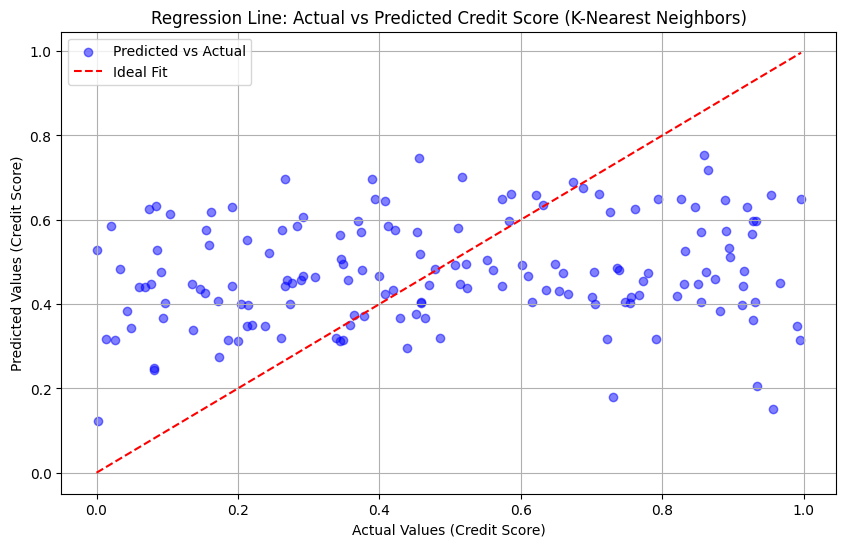

In [19]:
import matplotlib.pyplot as plt

# Convert y_test_final to a flattened array if it's a DataFrame
y_test_final_flat = y_test_final.values.flatten() if isinstance(y_test_final, pd.DataFrame) else y_test_final

# Plot regression line (Actual vs. Predicted values)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test_final_flat, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal fit line (where predicted = actual)
min_val = min(y_test_final_flat.min(), y_pred.min())
max_val = max(y_test_final_flat.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit")

# Add labels and title
plt.xlabel("Actual Values (Credit Score)")
plt.ylabel("Predicted Values (Credit Score)")
plt.title("Regression Line: Actual vs Predicted Credit Score (K-Nearest Neighbors)")
plt.legend()
plt.grid(True)
plt.show()
